In [1]:
import pandas as pd
import requests

In [2]:
def get_keys_from_file(filename):
    import imp
    f = open(filename)
    global keys
    keys = imp.load_source('keys',filename)
    f.close()
    
get_keys_from_file('/Users/peterschnatz/Insight/Project1/RightPrice/eventbrite_keys.py')

api_token = keys.PRIVATE_TOKEN

api_base = 'https://www.eventbriteapi.com/v3/'

In [3]:
request = requests.get(api_base+'events/68291233919/?expand=venue,organizer,format,category,subcategory,bookmark_info,refund_policy,ticket_classes,ticket_availability,external_ticketing,music_properties,publish_settings,guestlist_metrics,listing_properties&token='+api_token)
request_json = request.json()

In [4]:
print('Name: %s\nOrganizer:    %s\nOrganization: %s' % (request_json['name']['text'],request_json['organizer_id'],request_json['organization_id']))

Name: Therapeutic Yoga
Organizer:    18291367526
Organization: 283974720005


In [5]:
request = requests.get(api_base+'events/search/?categories=107&subcategories=7005&expand=ticket_classes&location.address=newyork&expand=ticket_classes&token='+api_token)
request_json = request.json()
request_json

{'pagination': {'object_count': 171,
  'page_number': 1,
  'page_size': 50,
  'page_count': 4,
  'has_more_items': True},
 'events': [{'name': {'text': "Meditation as Medication: A Doctor's Perspective",
    'html': 'Meditation as Medication: A Doctor&#39;s Perspective'},
   'description': {'text': "Can meditation improve high blood pressure, anxiety, depression, or pain? \xa0\r\n\r\nIf a doctor told you to meditate, would you hesitate?\r\nScience of Spirituality Presents\r\nMeditation as Medication:\xa0A Doctor's Perspective\r\nMeet with top Medical Experts and Researchers and learn how meditation has changed them and their patients. \xa0Both speakers are co-authors of the book - Meditation as Medication, a best seller!\r\nRetreat is FREE of Charge\r\nSaturday, September 28, 2019\xa0\r\n10.30 AM – Registration & Welcome\r\n11 AM – 12.30 PM\r\nMeditation for Body, Mind and Soul: Meditation Experiences within Clinical Practices\r\nSpeaker: Dr. Matt Raider, M.D., Medical Director, CT\r\n

In [6]:
request_json['pagination']

{'object_count': 171,
 'page_number': 1,
 'page_size': 50,
 'page_count': 4,
 'has_more_items': True}

In [7]:
yoga_df = pd.DataFrame()

In [8]:
event_properties = [{'event_name':event['name']['text'],
                     'organizer':event['organizer_id'],
                     'organization':event['organization_id'],
                     'price':event['ticket_classes'][0]['cost']} 
                    for event in request_json['events']]

In [9]:
yoga_df = pd.DataFrame(event_properties)

In [10]:
yoga_df.price.fillna(value=0,inplace=True)

In [11]:
yoga_df.iloc[0]

event_name      Meditation as Medication: A Doctor's Perspective
organizer                                             2583029518
organization                                         38243310276
price                                                          0
Name: 0, dtype: object

In [12]:
yoga_df.price[0]

0

In [13]:
for row,value in enumerate(yoga_df.price):
    if value != 0:
        yoga_df.price[row] = float(value['major_value'])

In [14]:
yoga_df

,event_name,organizer,organization,price
0,Meditation as Medication: A Doctor's Perspective,2583029518,38243310276,0
1,Free Yoga Class: Yoga Basics and Breath,15386741481,218201622803,0
2,Yoga in the Garden 2019,2339390903,33673116301,0
3,Yoga in the Fort Greene Park,18937400320,293950156663,0
4,Gentle Yoga,12813753767,201474657973,10
5,Community Sputnik Yoga (FREE) @378 Throop,3548334683,53980502862,0
6,DRUNK YOGA® at Row NYC...FREE Wine! Saturdays ...,15821524808,236398958683,45
7,DUMBO SOCIAL INFLUENCER EVENT (+ barre class!)...,12054388158,166625625478,0
8,BK Yoga Club: BK Morning Beats,18570445492,289358742177,20
9,Beginner Yogalates,18291367526,283974720005,100


In [15]:
request = requests.get(api_base+'categories/?token='+api_token)
request.json()

{'locale': 'en_US',
 'pagination': {'object_count': 21,
  'page_number': 1,
  'page_size': 50,
  'page_count': 1,
  'has_more_items': False},
 'categories': [{'resource_uri': 'https://www.eventbriteapi.com/v3/categories/103/',
   'id': '103',
   'name': 'Music',
   'name_localized': 'Music',
   'short_name': 'Music',
   'short_name_localized': 'Music'},
  {'resource_uri': 'https://www.eventbriteapi.com/v3/categories/101/',
   'id': '101',
   'name': 'Business & Professional',
   'name_localized': 'Business & Professional',
   'short_name': 'Business',
   'short_name_localized': 'Business'},
  {'resource_uri': 'https://www.eventbriteapi.com/v3/categories/110/',
   'id': '110',
   'name': 'Food & Drink',
   'name_localized': 'Food & Drink',
   'short_name': 'Food & Drink',
   'short_name_localized': 'Food & Drink'},
  {'resource_uri': 'https://www.eventbriteapi.com/v3/categories/113/',
   'id': '113',
   'name': 'Community & Culture',
   'name_localized': 'Community & Culture',
   'short

In [16]:
request = requests.get(api_base+'subcategories/?continuation=eyJwYWdlIjogMn0&token='+api_token)
request.json()

{'pagination': {'object_count': 197,
  'page_number': 2,
  'page_size': 50,
  'page_count': 4,
  'continuation': 'eyJwYWdlIjogM30',
  'has_more_items': True},
 'subcategories': [{'resource_uri': 'https://www.eventbriteapi.com/v3/subcategories/5004/',
   'id': '5004',
   'name': 'Dance',
   'name_localized': 'Dance',
   'parent_category': {'resource_uri': 'https://www.eventbriteapi.com/v3/categories/105/',
    'id': '105',
    'name': 'Performing & Visual Arts',
    'name_localized': 'Performing & Visual Arts',
    'short_name': 'Arts',
    'short_name_localized': 'Arts'}},
  {'resource_uri': 'https://www.eventbriteapi.com/v3/subcategories/5005/',
   'id': '5005',
   'name': 'Opera',
   'name_localized': 'Opera',
   'parent_category': {'resource_uri': 'https://www.eventbriteapi.com/v3/categories/105/',
    'id': '105',
    'name': 'Performing & Visual Arts',
    'name_localized': 'Performing & Visual Arts',
    'short_name': 'Arts',
    'short_name_localized': 'Arts'}},
  {'resource_uri

In [17]:
request = requests.get(api_base+'events/search/?page=2&location.address=usa&categories=108&expand=venue,organizer,format,category,subcategory,bookmark_info,refund_policy,ticket_classes,ticket_availability,external_ticketing,music_properties,publish_settings,guestlist_metrics,listing_properties&token='+api_token)
request_json = request.json()
num_pages = request_json['pagination']['page_count']

In [18]:
request_json

{'pagination': {'object_count': 2430,
  'page_number': 2,
  'page_size': 50,
  'page_count': 49,
  'has_more_items': True},
 'events': [{'name': {'text': '*FREE* International BigTime Wrestling',
    'html': '*FREE* International BigTime Wrestling'},
   'description': {'text': 'International BigTime Wrestling',
    'html': 'International BigTime Wrestling'},
   'id': '70683242481',
   'url': 'https://www.eventbrite.com/e/free-international-bigtime-wrestling-tickets-70683242481?aff=ebapi',
   'start': {'timezone': 'America/Detroit',
    'local': '2019-09-29T15:00:00',
    'utc': '2019-09-29T19:00:00Z'},
   'end': {'timezone': 'America/Detroit',
    'local': '2019-09-29T18:00:00',
    'utc': '2019-09-29T22:00:00Z'},
   'organization_id': '262767704819',
   'created': '2019-08-27T19:39:25Z',
   'changed': '2019-08-27T19:44:31Z',
   'published': '2019-08-27T19:41:46Z',
   'capacity': None,
   'capacity_is_custom': None,
   'status': 'live',
   'currency': 'USD',
   'listed': True,
   'shar

In [19]:
def add_data_to_df(request_json,current_df):
    event_properties = [{'event_name':event['name']['text'],
                         'event_id':event['id'],
                         'organizer':event['organizer_id'],
                         'organization':event['organization_id'],
                         'local_start_dt':event['start']['local'],
                         'local_end_dt':event['end']['local'],
                         'created_dt':event['created'],
                         'published_dt':event['published'],
                         'price':event['ticket_classes'][0]['cost']}
                        for event in request_json['events']]
    temp_df = pd.DataFrame(event_properties)
    return pd.concat([current_df,temp_df],axis=0).reset_index(drop=True)

In [20]:
sports_df = pd.DataFrame()

request = requests.get(api_base+'events/search/?categories=108&expand=ticket_classes&token='+api_token)
request_json = request.json()
num_pages = request_json['pagination']['page_count']

print(num_pages)

sports_df = add_data_to_df(request_json,sports_df)

for page in range(1,2):
    request = requests.get(api_base+'events/search/?categories=108&expand=ticket_classes&page='+str(page+1)+'&token='+api_token)
    request_json = request.json()
    sports_df = add_data_to_df(request_json,sports_df)



166


In [21]:
sports_df.price.fillna(value=0,inplace=True)

for row,value in enumerate(sports_df.price):
    if value != 0:
        sports_df.price[row] = float(value['major_value'])

In [22]:
bin_edges = [edge for edge in range(0,100,5)]

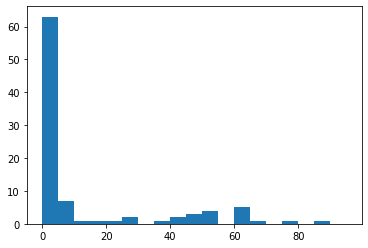

In [23]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.hist(sports_df.price,bins=bin_edges)
plt.show()

In [24]:
max(sports_df.price)

495.0

In [25]:
sports_df.loc[sports_df.price == 0,['event_id','local_start_dt','local_end_dt','created_dt','published_dt']]

,event_id,local_start_dt,local_end_dt,created_dt,published_dt
0,66702120839,2019-09-20T12:00:00,2019-09-21T21:00:00,2019-07-26T18:30:23Z,2019-07-30T17:12:21Z
1,61927175850,2019-10-17T19:00:00,2020-04-25T22:00:00,2019-05-15T12:21:32Z,2019-05-15T12:38:18Z
2,64868845463,2019-09-22T12:00:00,2019-09-22T19:00:00,2019-07-06T12:27:12Z,2019-07-06T13:00:36Z
4,63424273710,2019-10-17T19:00:00,2019-10-17T23:00:00,2019-06-13T10:47:57Z,2019-06-13T11:01:14Z
5,65715012371,2019-11-10T10:00:00,2019-11-17T19:00:00,2019-07-17T18:05:53Z,2019-07-25T15:04:16Z
7,70715047611,2019-09-19T18:30:00,2019-09-19T21:30:00,2019-08-27T23:41:39Z,2019-08-27T23:43:31Z
8,55749371872,2019-03-10T06:00:00,2019-11-11T18:00:00,2019-02-01T07:04:01Z,2019-02-21T08:14:35Z
9,72051374601,2019-09-28T19:00:00,2019-09-28T21:00:00,2019-09-09T08:42:57Z,2019-09-09T08:50:06Z
11,69413239869,2019-10-07T18:00:00,2019-10-07T19:30:00,2019-08-16T12:30:50Z,2019-08-16T12:41:50Z
12,45052425016,2018-04-20T09:00:00,2020-12-31T17:00:00,2018-04-11T04:47:44Z,2018-04-11T04:47:46Z


In [26]:
sports_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
event_name        100 non-null object
event_id          100 non-null object
organizer         100 non-null object
organization      100 non-null object
local_start_dt    100 non-null object
local_end_dt      100 non-null object
created_dt        100 non-null object
published_dt      100 non-null object
price             100 non-null object
dtypes: object(9)
memory usage: 7.2+ KB


In [27]:
request_json

{'pagination': {'object_count': 8250,
  'page_number': 2,
  'page_size': 50,
  'page_count': 165,
  'has_more_items': True},
 'events': [{'name': {'text': 'Colour Run', 'html': 'Colour Run'},
   'description': {'text': 'Monday 23 September 2019, 4-6pm - FREE to all students and staff of the university. FREE t-shirt for all entrants',
    'html': 'Monday 23 September 2019, 4-6pm - FREE to all students and staff of the university. FREE t-shirt for all entrants'},
   'id': '66684415883',
   'url': 'https://www.eventbrite.co.uk/e/colour-run-tickets-66684415883?aff=ebapi',
   'start': {'timezone': 'Europe/London',
    'local': '2019-09-23T16:00:00',
    'utc': '2019-09-23T15:00:00Z'},
   'end': {'timezone': 'Europe/London',
    'local': '2019-09-23T18:00:00',
    'utc': '2019-09-23T17:00:00Z'},
   'organization_id': '90402217607',
   'created': '2019-07-26T15:09:46Z',
   'changed': '2019-08-31T17:37:03Z',
   'published': '2019-07-26T15:37:28Z',
   'capacity': None,
   'capacity_is_custom': 

In [28]:
sports_df['local_start_dt'] = pd.to_datetime(sports_df['local_start_dt'],infer_datetime_format=True)
sports_df['local_end_dt'] = pd.to_datetime(sports_df['local_end_dt'],infer_datetime_format=True)
sports_df['created_dt'] = pd.to_datetime(sports_df['created_dt'],infer_datetime_format=True)
sports_df['published_dt'] = pd.to_datetime(sports_df['published_dt'],infer_datetime_format=True)

In [29]:
sports_df.sort_values(by=['created_dt'])

,event_name,event_id,organizer,organization,local_start_dt,local_end_dt,created_dt,published_dt,price
6,Southwest Warriors-Registration-Tickets-Apparel,10628761913,1880150567,17032646729,2018-05-11 17:00:00,2020-09-23 23:00:00,2014-02-14 15:57:19,2014-02-14 16:06:35,49.99
37,Sign Up to Stay Informed About Bell Joy Ride —...,22240494919,9857557238,167352192090,2017-01-31 19:00:00,2019-12-29 22:00:00,2016-02-25 22:20:28,2016-02-25 22:20:30,0
75,50+ Disc Golf Club,26984535472,10674141594,173307282955,2035-12-30 13:00:00,2035-12-31 13:00:00,2016-08-06 17:59:11,2016-08-06 18:01:51,0
68,GFNY URUGUAY CLUB,37368444022,8767323653,159761206564,2018-12-29 08:00:00,2026-03-27 08:00:00,2017-08-27 16:29:41,2017-08-27 16:40:58,0
29,Event Waiver @ Somers Sports Arena,37415609094,14901636350,223638375523,2017-08-29 10:00:00,2019-12-31 14:00:00,2017-08-29 12:15:47,2017-08-29 12:30:29,0
15,VIRTUAL run 2018 with 3D Eagle X Medallion: NE...,39354329860,7951529792,21598113846,2018-08-13 22:59:00,2019-12-28 23:00:00,2017-10-28 13:39:48,2017-10-28 14:11:18,65.95
21,Interessensbekundung im Rollstuhl- und Sehbehi...,44016760315,17669320465,175360750306,2018-08-01 10:00:00,2020-06-30 10:00:00,2018-03-09 10:11:35,2018-03-09 10:25:53,0
12,Virtual Fitness Room,45052425016,17191659078,173406872234,2018-04-20 09:00:00,2020-12-31 17:00:00,2018-04-11 04:47:44,2018-04-11 04:47:46,0
35,Breaking Through The Wall: Marathon Preparatio...,49385402067,4712910043,74221471731,2019-09-29 14:30:00,2019-09-29 16:00:00,2018-08-22 15:04:11,2019-08-13 15:37:55,15
36,Junior Paddlefest 2019,50975789960,15010502113,225089738441,2019-09-20 19:00:00,2019-09-22 18:00:00,2018-10-03 18:31:42,2019-06-22 19:48:28,45
